# Part 1
## Obtain, Check, Determine the Data Needed

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [12]:
#Getting the Data:

conf_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recov_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')


In [13]:
conf_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238


In [14]:
#Sorting According to latest numbers, decending:

#conf_df = conf_df.sort_values(by=[conf_df.columns[-1]], ascending=False)
#death_df = death_df.sort_values(by=[death_df.columns[-1]], ascending=False)
#recov_df = recov_df.sort_values(by=[recov_df.columns[-1]], ascending=False)

In [15]:
# Transforming to Time series

# Only Countries:
#conf_ts = conf_df.groupby('Country/Region').sum().drop(['Lat','Long'],axis=1).T
#death_ts = death_df.groupby('Country/Region').sum().drop(['Lat','Long'],axis=1).T
#recov_ts = recov_df.groupby('Country/Region').sum().drop(['Lat','Long'],axis=1).T

# With Regions

conf_df['location'] = np.where(conf_df['Country/Region']=='China', 'Ch-'+ conf_df['Province/State'],conf_df['Country/Region'])
conf_df = conf_df.groupby('location').sum().drop(['Lat','Long'],axis=1)
conf_df = conf_df.sort_values(by=[conf_df.columns[-1]], ascending=False)
conf_ts = conf_df.T

death_df['location'] = np.where(death_df['Country/Region']=='China', 'Ch-'+ death_df['Province/State'],death_df['Country/Region'])
death_df = death_df.groupby('location').sum().drop(['Lat','Long'],axis=1)
death_df = death_df.sort_values(by=[death_df.columns[-1]], ascending=False)
death_ts = death_df.T

recov_df['location'] = np.where(recov_df['Country/Region']=='China', 'Ch-'+ recov_df['Province/State'],recov_df['Country/Region'])
recov_df = recov_df.groupby('location').sum().drop(['Lat','Long'],axis=1)
recov_df = recov_df.sort_values(by=[recov_df.columns[-1]], ascending=False)
recov_ts = recov_df.T


In [16]:
conf_ts.to_csv('conf_ts.csv')

In [17]:
# Getting Totals for each case:

conf_ts['Total'] = conf_ts.sum(axis=1)
death_ts['Total'] = death_ts.sum(axis=1)
recov_ts['Total'] = recov_ts.sum(axis=1)


In [18]:
print('# of locations: ', len(list(conf_ts.columns)))
lst_locs = list(conf_ts.columns)
print(lst_locs)

# of locations:  176
['Ch-Hubei', 'Italy', 'Iran', 'Korea, South', 'Spain', 'Germany', 'France', 'US', 'Switzerland', 'Ch-Guangdong', 'Ch-Henan', 'Ch-Zhejiang', 'United Kingdom', 'Norway', 'Ch-Hunan', 'Ch-Anhui', 'Sweden', 'Netherlands', 'Ch-Jiangxi', 'Denmark', 'Japan', 'Ch-Shandong', 'Cruise Ship', 'Belgium', 'Austria', 'Ch-Jiangsu', 'Ch-Chongqing', 'Ch-Sichuan', 'Ch-Heilongjiang', 'Ch-Beijing', 'Ch-Shanghai', 'Qatar', 'Ch-Hebei', 'Ch-Fujian', 'Ch-Guangxi', 'Australia', 'Ch-Shaanxi', 'Malaysia', 'Greece', 'Finland', 'Singapore', 'Bahrain', 'Canada', 'Israel', 'Czechia', 'Slovenia', 'Ch-Yunnan', 'Portugal', 'Ch-Hainan', 'Iceland', 'Brazil', 'Ch-Guizhou', 'Ch-Hong Kong', 'Ch-Tianjin', 'Ch-Shanxi', 'Ch-Gansu', 'Ireland', 'Ch-Liaoning', 'Romania', 'Estonia', 'Philippines', 'Iraq', 'Egypt', 'Kuwait', 'Poland', 'Saudi Arabia', 'India', 'Indonesia', 'Ch-Jilin', 'Lebanon', 'United Arab Emirates', 'Thailand', 'San Marino', 'Ch-Xinjiang', 'Ch-Ningxia', 'Ch-Inner Mongolia', 'Chile', 'Russia', '

In [19]:
# converting 0's to nan, for plotting pourposes.

conf_ts2 = conf_ts.copy()
death_ts2 = death_ts.copy()
recov_ts2 = recov_ts.copy()

for loc_n in lst_locs:
    conf_ts2[loc_n] = np.where(conf_ts2[loc_n]==0, np.nan, conf_ts2[loc_n])
    death_ts2[loc_n] = np.where(death_ts2[loc_n]==0, np.nan, death_ts2[loc_n])
    recov_ts2[loc_n] = np.where(recov_ts2[loc_n]==0, np.nan, recov_ts2[loc_n])


In [20]:
f_app = conf_ts2.copy()
conf_ts2.Denmark
#death_ts2
#recov_ts2

1/22/20      NaN
1/23/20      NaN
1/24/20      NaN
1/25/20      NaN
1/26/20      NaN
1/27/20      NaN
1/28/20      NaN
1/29/20      NaN
1/30/20      NaN
1/31/20      NaN
2/1/20       NaN
2/2/20       NaN
2/3/20       NaN
2/4/20       NaN
2/5/20       NaN
2/6/20       NaN
2/7/20       NaN
2/8/20       NaN
2/9/20       NaN
2/10/20      NaN
2/11/20      NaN
2/12/20      NaN
2/13/20      NaN
2/14/20      NaN
2/15/20      NaN
2/16/20      NaN
2/17/20      NaN
2/18/20      NaN
2/19/20      NaN
2/20/20      NaN
2/21/20      NaN
2/22/20      NaN
2/23/20      NaN
2/24/20      NaN
2/25/20      NaN
2/26/20      NaN
2/27/20      1.0
2/28/20      1.0
2/29/20      3.0
3/1/20       4.0
3/2/20       4.0
3/3/20       6.0
3/4/20      11.0
3/5/20      11.0
3/6/20      24.0
3/7/20      24.0
3/8/20      37.0
3/9/20      92.0
3/10/20    264.0
3/11/20    444.0
3/12/20    617.0
3/13/20    804.0
3/14/20    836.0
Name: Denmark, dtype: float64

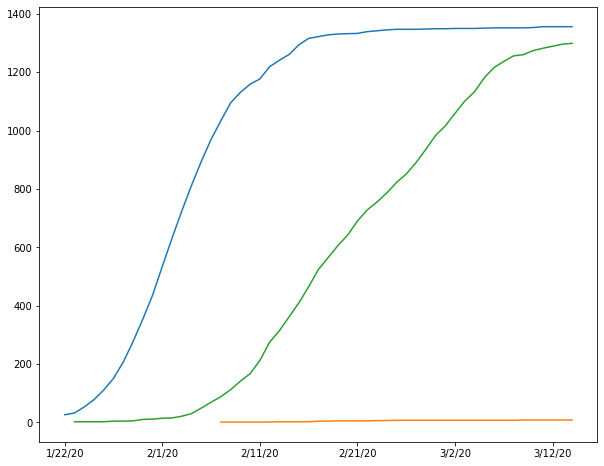

In [21]:
# Plotting each case locations:

fit = plt.figure(figsize=(10,8))
conf_ts2['Ch-Guangdong'].plot()
death_ts2['Ch-Guangdong'].plot()
recov_ts2['Ch-Guangdong'].plot()


In [22]:
# Top 16 locations
top_16_locs = lst_locs[:36]
print(top_16_locs)

['Ch-Hubei', 'Italy', 'Iran', 'Korea, South', 'Spain', 'Germany', 'France', 'US', 'Switzerland', 'Ch-Guangdong', 'Ch-Henan', 'Ch-Zhejiang', 'United Kingdom', 'Norway', 'Ch-Hunan', 'Ch-Anhui', 'Sweden', 'Netherlands', 'Ch-Jiangxi', 'Denmark', 'Japan', 'Ch-Shandong', 'Cruise Ship', 'Belgium', 'Austria', 'Ch-Jiangsu', 'Ch-Chongqing', 'Ch-Sichuan', 'Ch-Heilongjiang', 'Ch-Beijing', 'Ch-Shanghai', 'Qatar', 'Ch-Hebei', 'Ch-Fujian', 'Ch-Guangxi', 'Australia']


# Confirmed Cases Comparation Plots

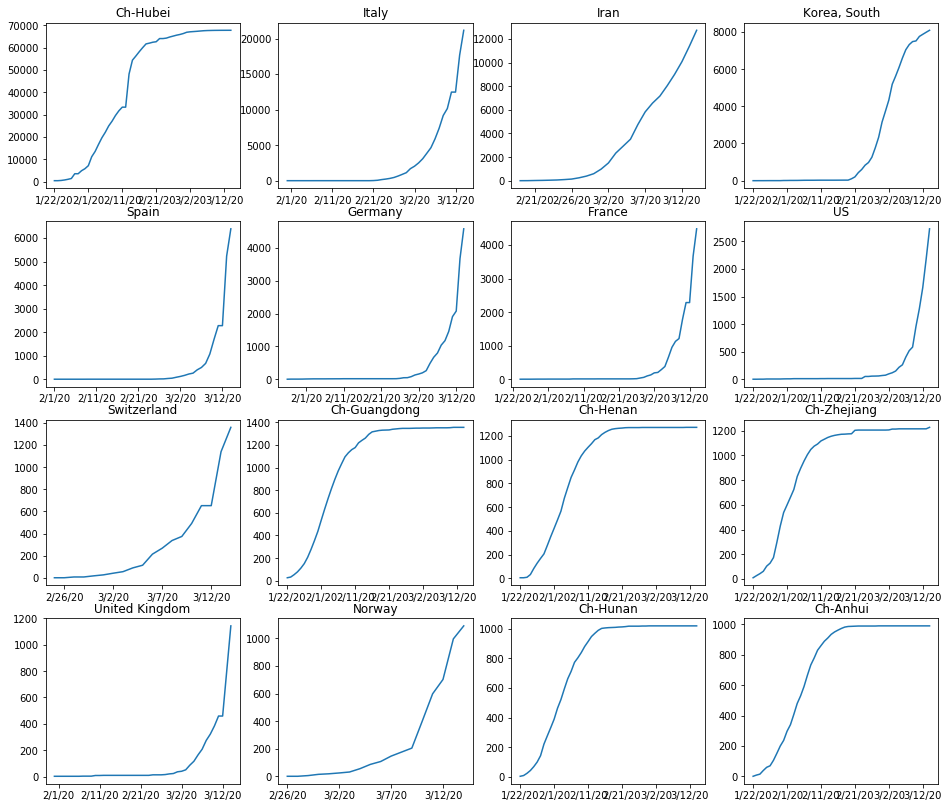

In [23]:
fig = plt.figure(figsize=(16,14))

# Divide the figure into a 4x4 grid:

ax1 = fig.add_subplot(4,4,1)
ax2 = fig.add_subplot(4,4,2)
ax3 = fig.add_subplot(4,4,3)
ax4 = fig.add_subplot(4,4,4)
ax5 = fig.add_subplot(4,4,5)
ax6 = fig.add_subplot(4,4,6)
ax7 = fig.add_subplot(4,4,7)
ax8 = fig.add_subplot(4,4,8)
ax9 = fig.add_subplot(4,4,9)
ax10= fig.add_subplot(4,4,10)
ax11= fig.add_subplot(4,4,11)
ax12= fig.add_subplot(4,4,12)
ax13= fig.add_subplot(4,4,13)
ax14= fig.add_subplot(4,4,14)
ax15= fig.add_subplot(4,4,15)
ax16= fig.add_subplot(4,4,16)


ax_lst = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16]

for count, axn in enumerate(ax_lst): 
    conf_ts2[top_16_locs[count]].plot(ax=axn)
    axn.set_title(top_16_locs[count])
    

# Death Cases Comparation Plots

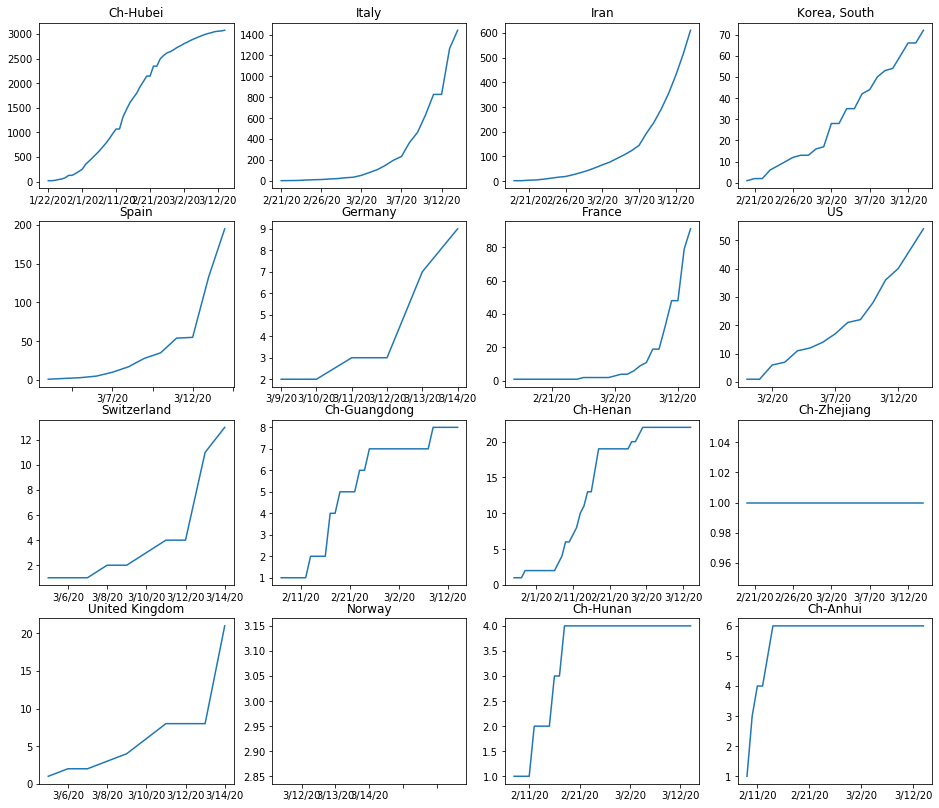

In [24]:
fig = plt.figure(figsize=(16,14))

# Divide the figure into a 4x4 grid:

ax1 = fig.add_subplot(4,4,1)
ax2 = fig.add_subplot(4,4,2)
ax3 = fig.add_subplot(4,4,3)
ax4 = fig.add_subplot(4,4,4)
ax5 = fig.add_subplot(4,4,5)
ax6 = fig.add_subplot(4,4,6)
ax7 = fig.add_subplot(4,4,7)
ax8 = fig.add_subplot(4,4,8)
ax9 = fig.add_subplot(4,4,9)
ax10= fig.add_subplot(4,4,10)
ax11= fig.add_subplot(4,4,11)
ax12= fig.add_subplot(4,4,12)
ax13= fig.add_subplot(4,4,13)
ax14= fig.add_subplot(4,4,14)
ax15= fig.add_subplot(4,4,15)
ax16= fig.add_subplot(4,4,16)


ax_lst = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16]

for count, axn in enumerate(ax_lst): 
    death_ts2[top_16_locs[count]].plot(ax=axn)
    axn.set_title(top_16_locs[count])
    

# Recovery Cases Comparation Plots

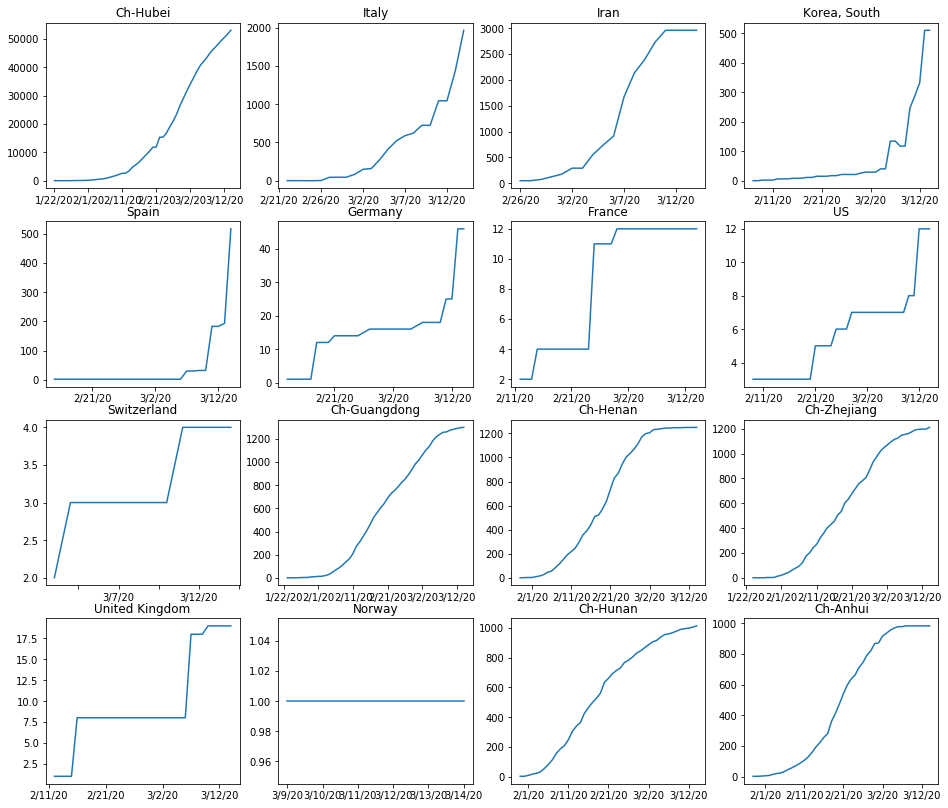

In [25]:
fig = plt.figure(figsize=(16,14))

# Divide the figure into a 4x4 grid:

ax1 = fig.add_subplot(4,4,1)
ax2 = fig.add_subplot(4,4,2)
ax3 = fig.add_subplot(4,4,3)
ax4 = fig.add_subplot(4,4,4)
ax5 = fig.add_subplot(4,4,5)
ax6 = fig.add_subplot(4,4,6)
ax7 = fig.add_subplot(4,4,7)
ax8 = fig.add_subplot(4,4,8)
ax9 = fig.add_subplot(4,4,9)
ax10= fig.add_subplot(4,4,10)
ax11= fig.add_subplot(4,4,11)
ax12= fig.add_subplot(4,4,12)
ax13= fig.add_subplot(4,4,13)
ax14= fig.add_subplot(4,4,14)
ax15= fig.add_subplot(4,4,15)
ax16= fig.add_subplot(4,4,16)


ax_lst = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16]

for count, axn in enumerate(ax_lst): 
    recov_ts2[top_16_locs[count]].plot(ax=axn)
    axn.set_title(top_16_locs[count])
    

# Tecnica Ross ( no pude )

In [26]:
#ross_st = pd.DataFrame()
#ross_st['y-1'] = conf_ts['Ch-Henan']
#ross_st.to_csv('ross_st.csv')

In [27]:
#ross_st2=pd.read_csv('ross_st.csv')

In [28]:
#ross_st2.head()

In [29]:
#Y = np.matrix(ross_st2['y'])
#teta = np.matrix(ross_st2[['y-1','y-2']])
#tetaT = teta.T
#fact = (teta.dot(tetaT))

In [30]:
conf_ts['Iran'].shape

(53,)

# Tecnica Cruve_fit - scipy  ( Se jugó, se gano )

In [57]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Len = 41
x = np.arange(len(conf_ts['Korea, South']))
#y = conf_ts['Ch-Anhui'].values
y = conf_ts['Iran'].values
#y = conf_ts['Ch-Henan'].values
#y = conf_ts['Ch-Hubei'].values
#y = conf_ts['South Korea'].values
#y = conf_ts['Italy'].values
#y = conf_ts['Ch-Guangdong'].values
#y = conf_ts['Mexico'].values
#y = conf_ts['Japan'].values
#y = conf_ts['France'].values
#y = conf_ts['Others'].values
#y = conf_ts['US'].values
#y = conf_ts['Hong Kong'].values
#y = conf_ts['Total'].values
#y = conf_ts['Germany'].values
#y = conf_ts['Spain'].values
#y = conf_ts['Ch-Ningxia'].values
#y = conf_ts['Bahrain'].values
#y = conf_ts['Kuwait'].values
#y = conf_ts['Ch-Inner Mongolia'].values
#y = conf_ts['Ch-Jilin'].values
#y = conf_ts['Switzerland'].values



# Logistic Regretion Formula:
# L / (1 + e ^-k( x - a ))
# L -> Max Growth ,  a -> x value at midpoint ,  k -> Growth Rate

def func(x, L, k, a):
    return L/(1 + np.exp(-k*(x-a)))

# Limitar: 0 < L < 100,000 ;  0 < k < 1 ;  0 < a < 50

In [58]:
popt, pcov = curve_fit(func, x, y, bounds=(0, [10000, 1, 100]))
popt


array([1.00000000e+04, 4.64900825e-01, 4.41798706e+01])

R2:  0.975670202080645


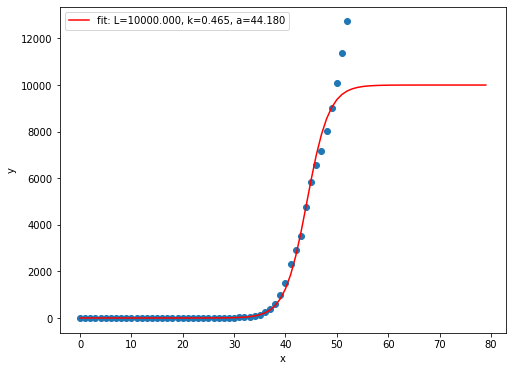

In [59]:
fig = plt.figure(figsize=(8,6))
plt.scatter(x,y)
x2 = np.arange(80)
plt.plot(x2, func(x2, *popt), 'r-', label='fit: L=%5.3f, k=%5.3f, a=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
r2 = r2_score(y, func(x, *popt))
print('R2: ',r2)

# Building DataFrame with Crucial Data

In [ ]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score


In [ ]:
res_df = pd.DataFrame()

res_df['Total_conf'] =  conf_df.iloc[:,-1]
res_df['Total_death'] =  death_df.iloc[:,-1]
res_df['Total_recov'] =  recov_df.iloc[:,-1]


row_df = pd.DataFrame(res_df.sum(axis = 0), columns=['Worldwide']).T
res_df = pd.concat([res_df, row_df])

#res_df.iloc[0:40]


In [ ]:
loc_list = list(res_df.index[:35])
loc_list.append('Mexico')

log_g_curves = []

def func(x, L, k, a):
    return L/(1 + np.exp(-k*(x-a)))

for loc_i in loc_list:
    x = np.arange(len(conf_ts[loc_i]))
    y = conf_ts[loc_i].values

    popt, pcov = curve_fit(func, x, y, bounds=(0, [90000, 1, 100]))
    
    L = popt[0]
    k = popt[1]
    a = popt[2]
    r2 = r2_score(y, func(x, *popt))
    if loc_i == 'Total':
        loc_i = 'Worldwide'
    
    dict = {'location':loc_i,'L':L,'k':k,'a':a,'R2':r2}
    log_g_curves.append(dict)

In [ ]:
final_1 = pd.DataFrame(log_g_curves).set_index('location')
final_1 = final_1.drop(['France','Germany','Others'])
final_1.index

In [ ]:
final_1.tail()

In [ ]:
final_1.to_csv('final_1.csv')

# Creating a First Appearence DataFrame

In [ ]:
day_app = pd.DataFrame(f_app.isnull().sum()+1, columns=['Day_inf_detected']).drop('Total')

In [ ]:
day_app.head()

In [ ]:
day_app.to_csv('./data/day_inf_dectectec.csv')